### Extraction of zipfile & Data Loading

In [2]:
import zipfile

def extract_zip(zip_file_path, extract_to_dir):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_dir)

In [4]:
extract_zip('train_csv.zip', 'data')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('data/train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
data = np.array(data)
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

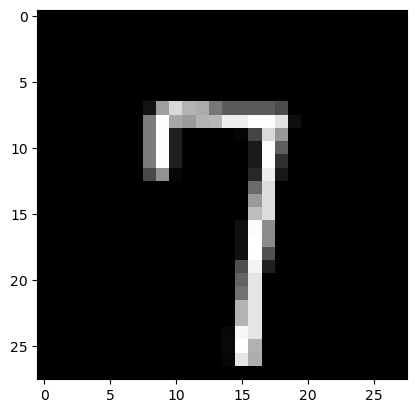

In [39]:
image = data[50,1:].reshape(28, 28)

# Display the image
plt.imshow(image, cmap='gray')
plt.show()

In [72]:
labels = data[:, 0].astype(int)  # Shape: (42000,)
pixels = data[:, 1:]
pixels.shape

(42000, 784)

### Normalization:

Scale pixel values from [0, 255] to [0, 1]

Why?: Prevents large input values from destabilizing gradients.

In [60]:
pixels = pixels / 255.0
pixels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### One-Hot Encoding:

Convert labels to 10-dimensional vectors (e.g., label 3 → [0,0,0,1,0,0,0,0,0,0])

Why?: Matches the output layer dimension for softmax classification.

In [69]:
num_labels = len(np.unique(labels))
num_labels

10

In [68]:
# can write a onehot function ?
one_hot_labels = np.eye(num_labels)[labels]  # Shape: (42000, 10)
one_hot_labels.shape

(42000, 10)

### Train and Validation split

In [71]:
pixels[:40000].shape

(40000, 784)

In [ ]:
# should we randomise the dataset for better results ?
X_train, X_test = pixels[:40000], pixels[40000:]
Y_train, Y_test = one_hot_labels[:40000], one_hot_labels[40000:]

### Initialization of weights and biases 

In [77]:
import numpy as np
uniform_random_numbers = np.random.rand(3, 2)
normal_random_numbers = np.random.randn(3, 2)
print(uniform_random_numbers)
print(normal_random_numbers)

[[0.19521653 0.07341845]
 [0.52178233 0.8760092 ]
 [0.24412906 0.05010721]]
[[-0.84835778 -1.00308855]
 [ 0.37683707  0.87656949]
 [-0.45815432 -0.76527037]]


In [79]:
n = 10  # Example value for n
scaling_factor = np.sqrt(2 / n)

# Generate a 3x2 array of random numbers from a standard normal distribution
normal_random_numbers = np.random.randn(3, 2)

# Scale the random numbers
scaled_random_numbers = normal_random_numbers * scaling_factor

print("Original random numbers:\n", normal_random_numbers)
print("Scaled random numbers:\n", scaled_random_numbers)

Original random numbers:
 [[ 0.40857196 -2.45410887]
 [-0.87493619  0.84608207]
 [ 0.25425888  1.03687717]]
Scaled random numbers:
 [[ 0.18271893 -1.09751085]
 [-0.39128336  0.3783794 ]
 [ 0.11370803  0.46370557]]


In [73]:
# def init_params():
#     W1 = np.random.rand(10, 784) - 0.5
#     b1 = np.random.rand(10, 1) - 0.5
#     W2 = np.random.rand(10, 10) - 0.5
#     b2 = np.random.rand(10, 1) - 0.5
#     return W1, b1, W2, b2

Why He initialization ?

ReLU sets half the neurons to zero during forward propagation. He initialization compensates for this by doubling the variance of the weights, ensuring the output variance remains stable (prevents gradients from vanishing or exploding).

Why was 128 neurons chosen ?

Rule of Thumb: Start with a hidden layer size between the input (784) and output (10) layers.

Why the dimension of 784,128?

For a layer with n_input neurons and n_output neurons, weights must have shape (n_input, n_output) as per matrix multiplication rules.

In [80]:
def initialize_parameters():
    np.random.seed(42)  # Fix randomness for reproducibility
    
    W1 = np.random.randn(784, 128) * np.sqrt(2 / 784)  # He initialization for ReLU
    b1 = np.zeros((1, 128))                             # Zero bias
    W2 = np.random.randn(128, 10) * np.sqrt(2 / 128)    # He initialization
    b2 = np.zeros((1, 10))                              # Zero bias
    return W1, b1, W2, b2

### Forward propogation 

In [81]:
# def ReLU(Z):
#     return np.maximum(Z, 0)

# def softmax(Z):
#     A = np.exp(Z) / sum(np.exp(Z))
#     return A
    
# def forward_prop(W1, b1, W2, b2, X):
#     Z1 = W1.dot(X) + b1
#     A1 = ReLU(Z1)
#     Z2 = W2.dot(A1) + b2
#     A2 = softmax(Z2)
#     return Z1, A1, Z2, A2

# def ReLU_deriv(Z):
#     return Z > 0

# def one_hot(Y):
#     one_hot_Y = np.zeros((Y.size, Y.max() + 1))
#     one_hot_Y[np.arange(Y.size), Y] = 1
#     one_hot_Y = one_hot_Y.T
#     return one_hot_Y

Why z - np.max ?

 If values in Z are large (e.g., 1000), np.exp(Z) becomes inf (overflow). therefore we Subtract the maximum value in Z before exponentiation

In [82]:
def relu(z):
    return np.maximum(0, z)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def forward(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1    # Shape: (batch_size, 128)
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2   # Shape: (batch_size, 10)
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

### Loss Calculation

In [85]:
def compute_loss(Y_pred, Y_true):
    return -np.mean(np.sum(Y_true * np.log(Y_pred + 1e-15), axis=1))  # +1e-15 to avoid log(0)

### Backward Propogation

In [ ]:
def backward(X, Y, Z1, A1, A2, W2):
    batch_size = X.shape[0]
    
    # Output layer gradients
    dZ2 = A2 - Y                            # Shape: (batch_size, 10)
    dW2 = (A1.T @ dZ2) / batch_size          # Shape: (128, 10)
    db2 = np.sum(dZ2, axis=0, keepdims=True) / batch_size
    
    # Hidden layer gradients
    dZ1 = (dZ2 @ W2.T) * (Z1 > 0)           # Shape: (batch_size, 128)
    dW1 = (X.T @ dZ1) / batch_size           # Shape: (784, 128)
    db1 = np.sum(dZ1, axis=0, keepdims=True) / batch_size
    
    return dW1, db1, dW2, db2